<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2025-I/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión lineal

Establece una relación lineal entre la variable predictora y la variable objetivo, de esta forma puede predecir nuevos valores de registros desconocidos:

$$y_i = w_o + w_1x_i$$

##Conceptos del ML

- Matriz de características: $X \in R^{n\times p}$ , donde $n$ es el número de observaciones y $p$ el número de características, hace referencia a las variables predictoras
- Vector objetivo: $y \in R^{n}$, hace referencia a la variable que se desea predecir o la etiqueta de clase.

In [1]:
# Para iniciar, crearemos un toyset.

# Cargamos las librerías necesarias
import numpy as np #librería para manejo numérico
import pandas as pd #librería para gestión de tablas
import matplotlib.pyplot as plt #librería para gráficos simples

# Generamos una variable aleatoria
rng = np.random.RandomState(42)
# Generamos la variable predictora con 50 observaciones
x = 10 * rng.rand(50)
# Generamos la variable objetivo: y = 2x-1 + e
y = 2 * x - 1 + rng.randn(50)

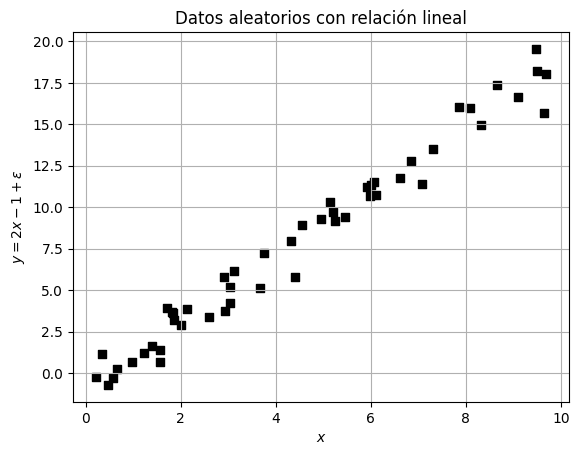

In [2]:
# Graficamos la relación entre las dos variables
plt.scatter(x, y, marker = 's', color = 'black') #gráfico de dispersión
plt.grid() #cuadrícula para el gráfico
plt.title('Datos aleatorios con relación lineal') #título
plt.xlabel('$x$') #leyenda del eje x
plt.ylabel('$y = 2x-1 + \epsilon$') #leyenda del eje y
plt.show()

In [3]:
# 1. Elegimos el modelo adecuado para los datos
from sklearn.linear_model import LinearRegression #importamos el modelo

#2. Fijamos los hiperparámetros
# En este caso solo debemos elegir si se ajusta el intercepto o no

#3. Instanciamos el modelo
modelo = LinearRegression(fit_intercept = True)

In [4]:
#4. Organizamos los datos para que las dimensiones sean las apropiadas
x.shape #visualizamos la dimensión de x

(50,)

In [5]:
X = x[:, np.newaxis] #cambiamos la dimensión de x
X.shape #visualizamos la dimensión de X

(50, 1)

In [6]:
#visualizamos la dimensión y
y.shape

(50,)

In [7]:
# 5. Entrenamos el modelo
modelo.fit(X, y)

LinearRegression()

In [8]:
#6. Validamos el comportamiento del modelo con unos datos nuevos

# Generamos unos datos nuevos
x_test = np.linspace(-1, 11)
# Configuramos las dimensiones adecuadas
X_test = x_test[:, np.newaxis]
# Predecimos los valores de y
y_test = modelo.predict(X_test)

In [9]:
#7. Evaluamos el desempeño del modelo
modelo.score(X,y) #en este lo evaluaremos con los datos de entrenamiento

0.9749140085676858

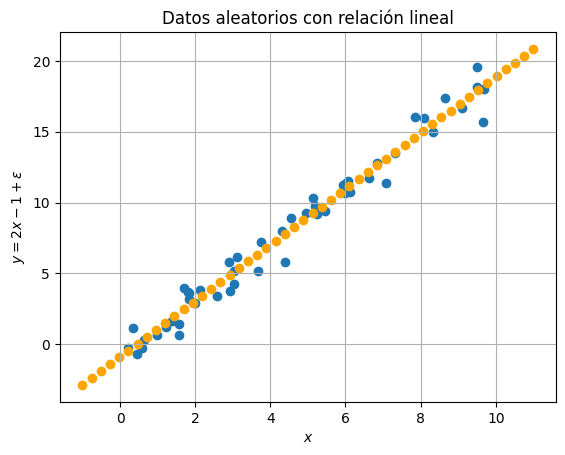

In [10]:
# Si queremos hacer una evaluación visual, tendremos
plt.scatter(x, y)
plt.scatter(x_test, y_test, color = 'orange')
plt.grid()
plt.title('Datos aleatorios con relación lineal')
plt.xlabel('$x$')
plt.ylabel('$y = 2x-1 + \epsilon$')
plt.show()

#Ejercicio

1. Cargue el archivo `california_housing_train`que está en la carpeta `sample_data` de Colab.
2. Implemente un modelo de regresión para predecir la variable `median_house_value`.
3. Analice el desempeño del modelo propuesto con el conjunto de datos `california_housing_test`.

In [11]:
# Cargamos la información requerida
data_train = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Visualizamos la información de la data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [12]:
# Podemos observar que todos los datos están completos y son números flotantes.
# Vamos a revisar la variable objetivo

data_train['median_house_value'].describe()

,median_house_value
count,17000.000000
mean,207300.912353
std,115983.764387
min,14999.000000
25%,119400.000000
50%,180400.000000
75%,265000.000000
max,500001.000000


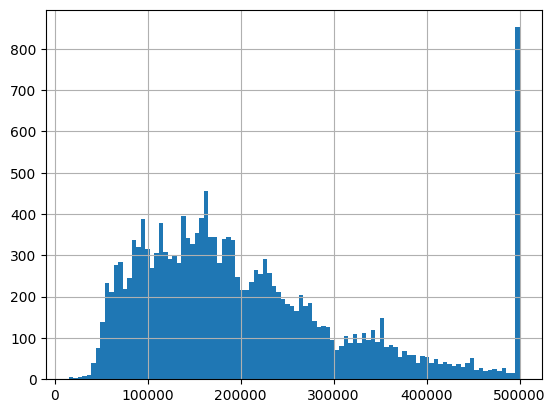

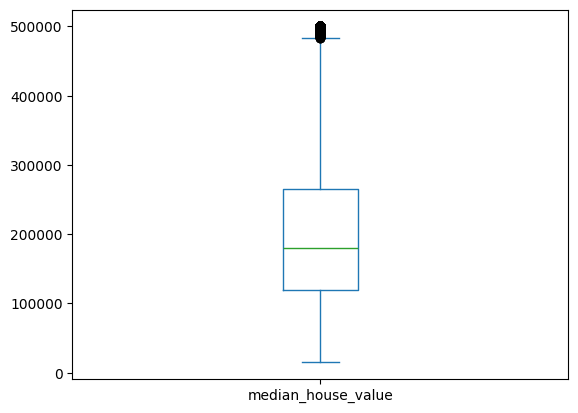

In [13]:
# A groso modo, la variable parece tener una buena distribución, pero para un correcto análisis haremos
# otras inspecciones visuales

# Graficamos el histograma
data_train['median_house_value'].hist(bins = 100)
plt.show()

# Graficamos el diagrama de cajas y bigotes

data_train['median_house_value'].plot(kind = 'box')
plt.show()

<Axes: >

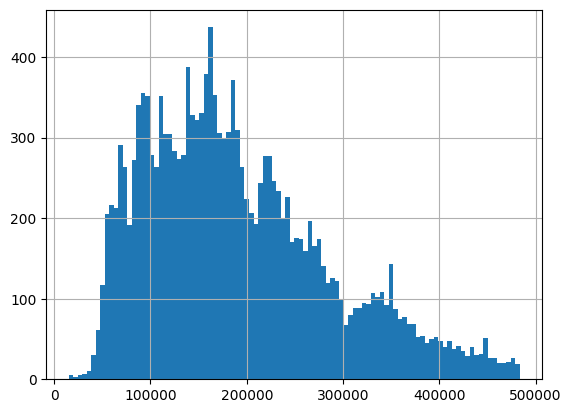

In [14]:
# La presencia de datos atípicos es evidente en ambos gráficos. Haremos una remoción simple de datos atípicos basada en
# el rango intercuartil

# Calculamos el cuartil 1
Q1 = data_train['median_house_value'].quantile(0.25)
# Calculamos el cuartil 3
Q3 = data_train['median_house_value'].quantile(0.75)
# Calculamos el rango intercuartil
RIQ = Q3 - Q1
# Definimos el límite superior
upper_limit = 1.5*RIQ +   Q3
# Filtramos las filas
data_train_sin_outliers = data_train[data_train['median_house_value']<=upper_limit]
# Visualizamos el resultado
data_train_sin_outliers['median_house_value'].hist(bins = 100)

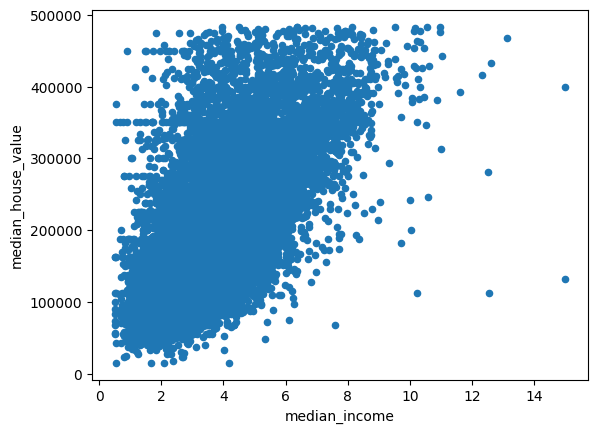

In [15]:
# Ha con la variable objetivo adecuada, procederemos a elegir una variable predictora.
# Haremos la regresión con la variable median_income.
# Grafiamos la relación de la variable predictora con la variable objetivo

data_train_sin_outliers.plot.scatter(x = 'median_income', y = 'median_house_value');

In [16]:
# Parecen tener una buena relación, procederemos a general la matriz de características y el vector de salida
X = data_train_sin_outliers[['median_income']]
X.shape

(16105, 1)

In [17]:
y = data_train_sin_outliers['median_house_value']
y.shape

(16105,)

In [18]:
# Instanciamos el modelo
modelo = LinearRegression(fit_intercept=True)
# Entrenamos el modelo
modelo.fit(X, y)



LinearRegression()

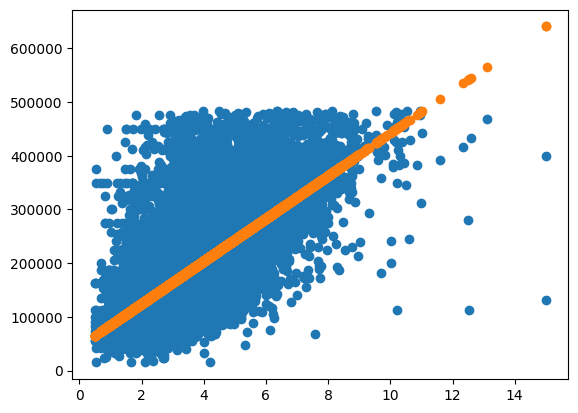

In [19]:
# Para el conjunto de entrenamiento, vamos a visualizar qué tan bien aprendió el modelo
y_pred = modelo.predict(X)
plt.scatter(X, y);
plt.scatter(X, y_pred);

In [20]:
# Ahora vamos a validar el desempeño del modelo con el conjunto de test

data_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
X_test = data_test[['median_income']]
y_test = data_test['median_house_value']
modelo.score(X_test, y_test)

0.4449461209990522

# Regresión lineal múltiple

En la regresión lineal múltiple, se tienen 2 o más variables predictoras, de la forma:

$$ y_i = w_0 + w_1x_{i,1} + w_2x_{i,2} + \ldots$$

In [21]:
# Generamos la matriz de características
X = data_train_sin_outliers[['median_income', 'total_rooms', 'total_bedrooms']]
X.shape

(16105, 3)

In [22]:
y.shape

(16105,)

In [23]:
# Instanciamos el modelo
modelo_multiple = LinearRegression(fit_intercept=True)
# Entrenamos el modelo
modelo_multiple.fit(X, y)

LinearRegression()

In [25]:
# Calculamos la variable predecida por el modelo
y_pred = modelo_multiple.predict(X)

In [26]:
# Calculamos la métrica de desempeño
modelo_multiple.score(X, y)

0.4633347231266035

In [27]:
# Calculamos la métrica de desempeño para el test
X_test = data_test[['median_income', 'total_rooms', 'total_bedrooms']]
y_test = data_test['median_house_value']
modelo_multiple.score(X_test, y_test)

0.48022853016214384

Con el fin de mejorar el desempeño del modelo, se utilizaran todas las varibles predictoras disponibles.

In [28]:
# Creamos la matriz de características de train
X = data_train_sin_outliers.drop(columns = ['median_house_value'])
# Creamos el vector de salida de train
y = data_train_sin_outliers['median_house_value']

In [29]:
# Instanciamos un nuevo modelo
modelo_full = LinearRegression(fit_intercept=True)
# Entrenamos el modelo
modelo_full.fit(X, y)

LinearRegression()

In [30]:
# Revisamos el desempeño en el conjunto de entrenamiento
modelo_full.score(X, y)

0.6075276000467136

In [31]:
# Revisamos el desempeño en el conjunto de test
X_test = data_test.drop(columns = ['median_house_value'])
y_test = data_test['median_house_value']
modelo_full.score(X_test, y_test)

0.6134244367082533